# Modelo de Regressão Linear para Prever o 'Não Consignado'
Neste notebook, vamos construir um modelo de regressão linear simples para prever os valores da coluna 'Não Consignado' usando a coluna 'Cartão de Crédito' como variável explicativa. O objetivo é entender como o crédito no cartão influencia o crédito não consignado.

## Passo 1: Carregar a Base de Dados
Primeiramente, vamos carregar a base de dados fornecida e explorar suas características básicas.

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd

# Carregar a base de dados
file_path = 'Case_regressao_linear.xlsx'
df = pd.read_excel(file_path)

# Exibir as primeiras linhas da base de dados
df.head()

,Data,Não\nConsignado,Cartão de\ncrédito
0,2018-12-01,13.10,8.04
1,2019-01-01,13.10,8.18
2,2019-02-01,12.92,8.32
3,2019-03-01,13.05,8.34
4,2019-04-01,13.12,8.40


## Passo 2: Pré-processamento dos Dados
Vamos verificar se há dados faltantes e renomear as colunas para facilitar o acesso no modelo de regressão.

In [2]:
# Renomear as colunas para facilitar o acesso
df.columns = ['Data', 'Nao_Consignado', 'Cartao_Credito']

# Verificar se há dados faltantes
df.isnull().sum()

,0
Data,0
Nao_Consignado,0
Cartao_Credito,0


## Passo 3: Análise Exploratória dos Dados
Vamos observar a correlação entre as variáveis e visualizar a relação entre 'Cartão de Crédito' e 'Não Consignado'.

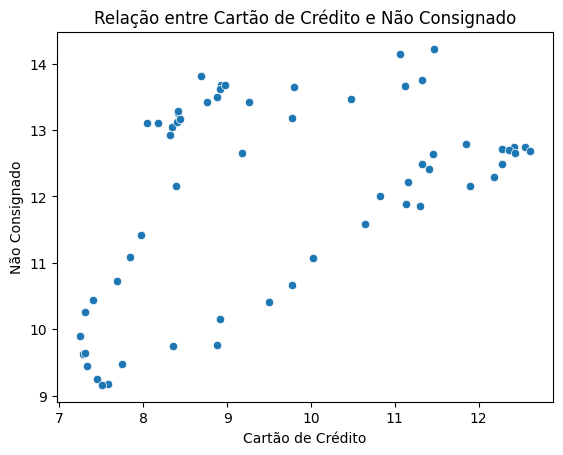

In [3]:
# Importar bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a correlação entre as variáveis
sns.scatterplot(data=df, x='Cartao_Credito', y='Nao_Consignado')
plt.title('Relação entre Cartão de Crédito e Não Consignado')
plt.xlabel('Cartão de Crédito')
plt.ylabel('Não Consignado')
plt.show()

## Passo 4: Construir o Modelo de Regressão Linear
Vamos dividir os dados em variáveis explicativas e resposta e, em seguida, ajustar um modelo de regressão linear.

In [4]:
# Importar bibliotecas para modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Dividir os dados em variáveis explicativas (X) e resposta (Y)
X = df[['Cartao_Credito']]
Y = df['Nao_Consignado']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Fazer previsões nos dados de teste
Y_pred = model.predict(X_test)

## Passo 5: Avaliação do Modelo
Vamos avaliar o desempenho do modelo usando as seguintes métricas:
- **Erro Quadrático Médio (MSE)**: mede a média dos erros ao quadrado.
- **R-quadrado (R²)**: indica a proporção da variabilidade da variável resposta explicada pelo modelo.
- **Erro Absoluto Médio (MAE)**: mede a média das diferenças absolutas entre os valores previstos e reais.

In [5]:
# Calcular métricas de desempenho
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R-quadrado: {r2:.2f}')

MSE: 2.31
MAE: 1.38
R-quadrado: 0.22


## Passo 6: Visualização dos Resultados
Vamos plotar os valores previstos em comparação com os valores reais para entender melhor o desempenho do modelo.

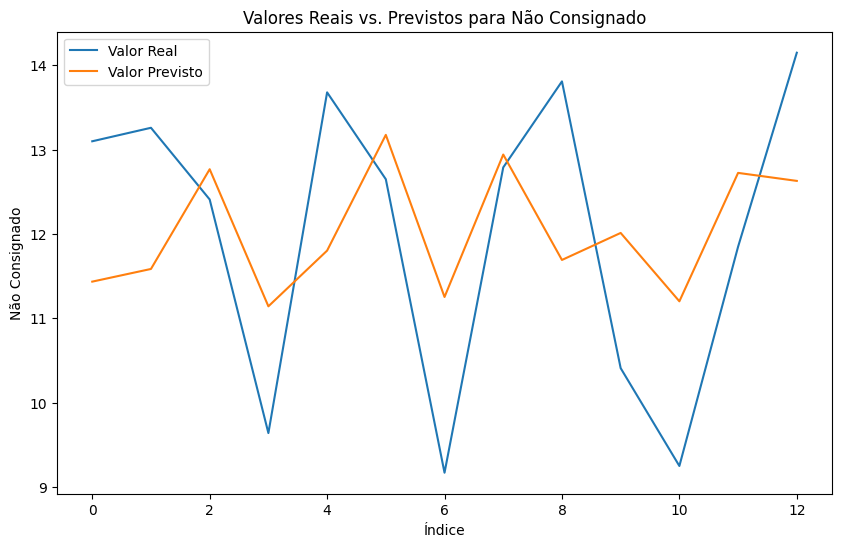

In [6]:
# Plotar os valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Valor Real')
plt.plot(Y_pred, label='Valor Previsto')
plt.xlabel('Índice')
plt.ylabel('Não Consignado')
plt.title('Valores Reais vs. Previstos para Não Consignado')
plt.legend()
plt.show()

# Conclusão
Neste tutorial, construímos um modelo de regressão linear para prever o crédito não consignado com base no crédito no cartão. As métricas de desempenho mostraram que o modelo é razoável para esta tarefa, com um R-quadrado indicando a proporção de variabilidade explicada pelo modelo. A visualização dos resultados também mostrou a proximidade entre os valores reais e previstos. Ajustes adicionais ou a inclusão de novas variáveis podem melhorar o modelo.